In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('/content/drive/Shareddrives/1:1_Rohan_Kaushikan/Dataset/train_data.csv')
val_data = pd.read_csv('/content/drive/Shareddrives/1:1_Rohan_Kaushikan/Dataset/val_data.csv')

In [ ]:
X_train = train_data.drop(['Disease_Free_Status'], axis = 1)
y_train = train_data['Disease_Free_Status']

In [ ]:
X_val = val_data.drop(['Disease_Free_Status'], axis = 1)
y_val = val_data['Disease_Free_Status']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
hypertrees = 400
depth = 3

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=hypertrees, max_depth=depth, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict labels on validation set
y_val_pred = xgb_model.predict(X_val)

# Calculate accuracy and recall on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)

print("Validation Accuracy:", accuracy_val)
print("Validation Recall:", recall_val)

Validation Accuracy: 0.8807947019867549
Validation Recall: 0.0


In [ ]:
hypertrees = 100
depth = 3

In [ ]:
xgb_model_upsampled = xgb.XGBClassifier(n_estimators=hypertrees, max_depth=depth, random_state=42)
xgb_model_upsampled.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict labels on validation set
y_val_pred = xgb_model_upsampled.predict(X_val)

# Calculate accuracy and recall on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)

print("Validation Accuracy:", accuracy_val)
print("Validation Recall:", recall_val)

Validation Accuracy: 0.7748344370860927
Validation Recall: 0.3333333333333333


In [ ]:
test_data = pd.read_csv('/content/drive/Shareddrives/1:1_Rohan_Kaushikan/Dataset/test_data.csv')

In [ ]:
X_test = test_data.drop(['Disease_Free_Status'], axis = 1)
y_test = test_data['Disease_Free_Status']

In [ ]:
# Make predictions on the test data
y_pred = xgb_model_upsampled.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.8404255319148937
Recall: 0.2857142857142857


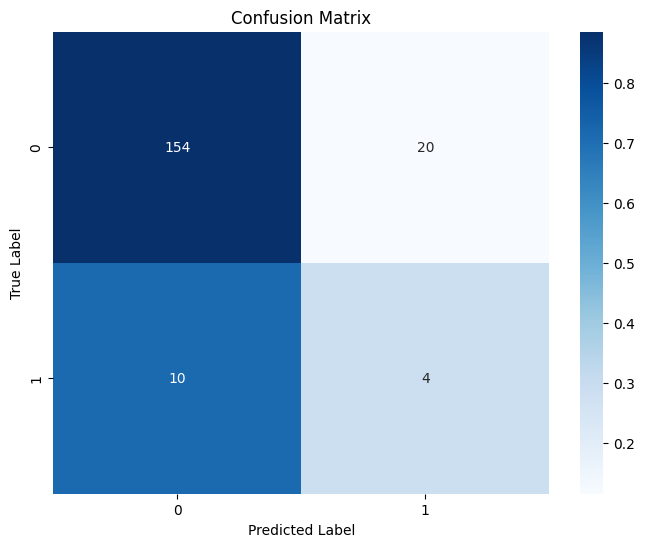

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
class_names = ['0', '1']
sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
class_counts = test_data['Disease_Free_Status'].value_counts()

print(class_counts)

0    174
1     14
Name: Disease_Free_Status, dtype: int64
